<a href="https://colab.research.google.com/github/sabaagizew/Twitter-Data-Analysis/blob/fix_bug/Challenge__Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [ ]:
main_objectives ='''The main objective of our project is to know the main reason for employees for leaving.
And find the same reason for the other remain emlpoyees about to leave.
Finding the most frequent reason from the given attributes.
'''

In [ ]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''First we sohuld collect and gather data from each employees by asking the given attribute.
And then by using apropriate ml modeiling we can predict the reason why the remail employees will leave.
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [ ]:
why_metrics = '''I choose sensitivity metric,it helps to predict the main reason for employees to leave from the whole reason.
also precision metrics tell us the probability of the employees reason for leaving and the reason for others employees leaving.
It increase our senstivity
'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''1.By checking web traffic in real-time reports in insights report.
2.Avoid dupplicate tracking codes with site health by click on passed tests and check tracking code is properly being built.
3.By view the source code of my site and look for my tracking code.
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''1.The employees may not fully analyzed data or focus on the measures.
2.If an employee has to manually sift through data it can be impossible to gain real_time insights on what is currently happening.
3.The data may not visually presented because it taking time to pull information from multiple areas.
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [48]:
#importing prerequisite libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def text_catagory(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'
    
df = pd.read_csv('https://raw.githubusercontent.com/behigu/Challenge_-Day2/main/output.csv')

# see polarity
df['polarity']

0       0.166667
1       0.133333
2       0.316667
3       0.086111
4       0.280000
          ...   
6527    0.000000
6528    0.086111
6529    0.281250
6530    0.125000
6531    0.000000
Name: polarity, Length: 6532, dtype: float64

In [33]:
#Getting and reading the data

df = pd.read_csv('https://raw.githubusercontent.com/behigu/Challenge_-Day2/main/output.csv')
df.head()

,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,None,NaN,TelGlobalHealth\nWHOAFRO,Mass
1,1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,None,NaN,globalhlthtwit,"Edinburgh, Scotland"
2,2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,red4research,NHSRDForum\nResearch2note\nNHSRDForum,NaN
3,3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,None,NaN,HighWireTalk,NaN
4,4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,None,NaN,PeterHotez,United Kingdom


In [45]:
cleanTweet = df[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleanTweet.head()

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [49]:
#cleanTweet['score'] = cleanTweet["polarity"].map(text_catagory)
cleanTweet.head()

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


KeyError: ignored

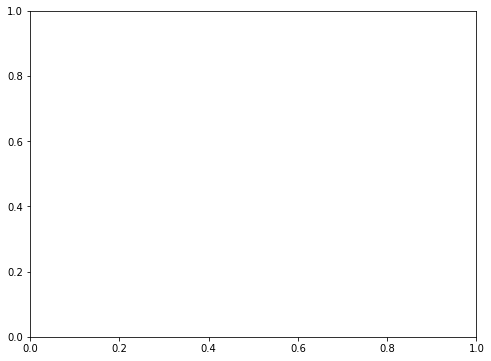

In [50]:
# visualize usinng matplotlib (barchart)
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean_text'].count().plot.bar(ax=axis)